In [55]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [56]:
df_train = pd.read_csv('./houseprices/train.csv')
df_test  = pd.read_csv('./houseprices/test.csv')

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

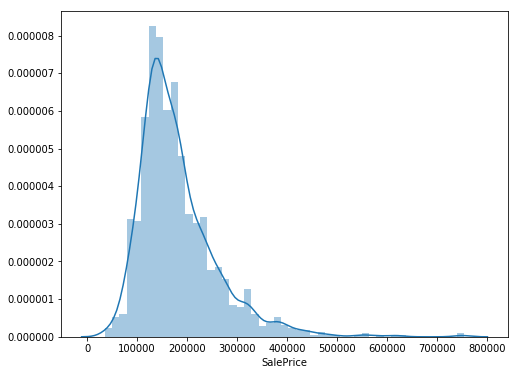

In [58]:
#target 시각화
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['SalePrice'])

In [59]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [60]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FAA528400>,
      dtype=object)

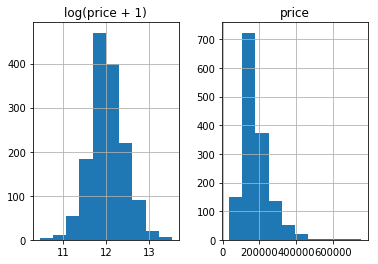

In [61]:
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

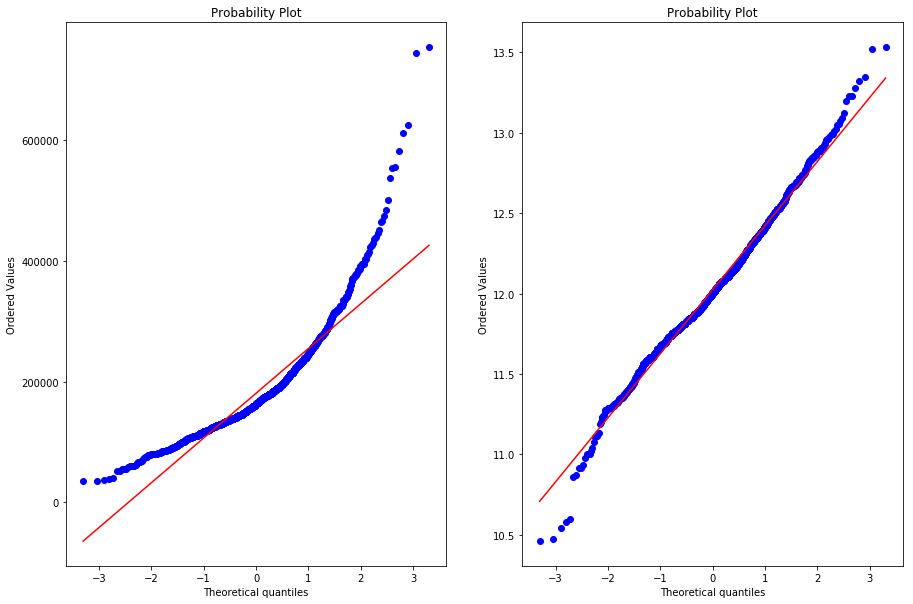

In [62]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['SalePrice'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['SalePrice']), plot=plt)

In [63]:
target_log = np.log1p(df_train['SalePrice'])
target_log.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [64]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_obj = df_train.select_dtypes(include=[np.object])

df_test_num = df_test.select_dtypes(include=[np.number])
df_test_obj = df_test.select_dtypes(include=[np.object])

'\nOverallQual : Overall material and finish quality\nGrLivArea : Above grade (ground : the portion of a home that is above the ground) living area square feet\nGarageCars : Size of garage in car capacity\nGarageArea : Size of garage in square feet\nTotalBsmtSF : Total square feet of basement area (지하실 the lowermost portion of a structure partly or wholly below ground level; often used for storage)\n1stFlrSF : First Floor square feet\nFullBath : Full bathrooms above grade\nTotRmsAbvGrd : Total rooms above grade (does not include bathrooms)\nYearBuilt : Original construction date\n'

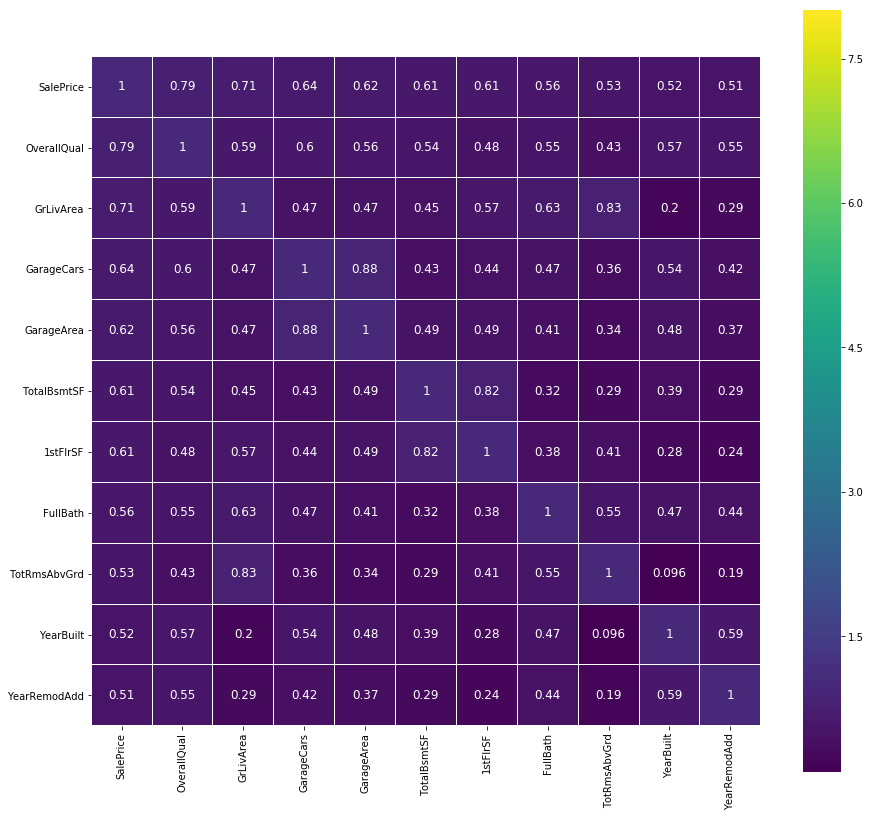

In [65]:
#saleprices와 높은 관계를 가진 feature보기.
f,ax=plt.subplots(figsize=(15,14))
correlation=df_train_num.corr() #전체 각 feature간의 관계
correlation['SalePrice'].sort_values(ascending=False)
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm,vmax=8, linewidths=0.01, square=True,
           annot=True, cmap='viridis',
           linecolor='white', xticklabels=cols.values,
           annot_kws={'size':12}, yticklabels=cols.values)
#pearson : numeric값들과의 상관
#spearman : categorical한 변수에도 사용가능한 상관관계
'''
OverallQual : Overall material and finish quality
GrLivArea : Above grade (ground : the portion of a home that is above the ground) living area square feet
GarageCars : Size of garage in car capacity
GarageArea : Size of garage in square feet
TotalBsmtSF : Total square feet of basement area (지하실 the lowermost portion of a structure partly or wholly below ground level; often used for storage)
1stFlrSF : First Floor square feet
FullBath : Full bathrooms above grade
TotRmsAbvGrd : Total rooms above grade (does not include bathrooms)
YearBuilt : Original construction date
'''

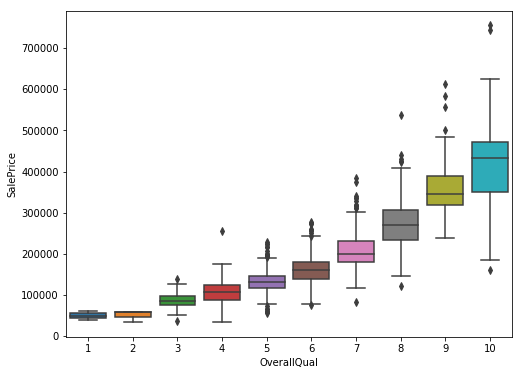

In [66]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
#집의 가치 -> 비례관계, 사분위수 외의 데이터들은 무엇인지 관찰할 필요

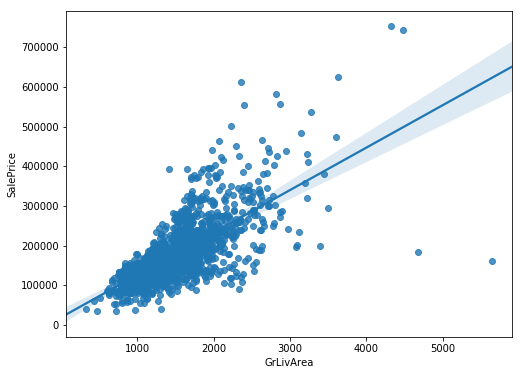

In [67]:
# GrLivArea
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=data)
#거실의 크기에 따른 가격 분포. 대체로 증가

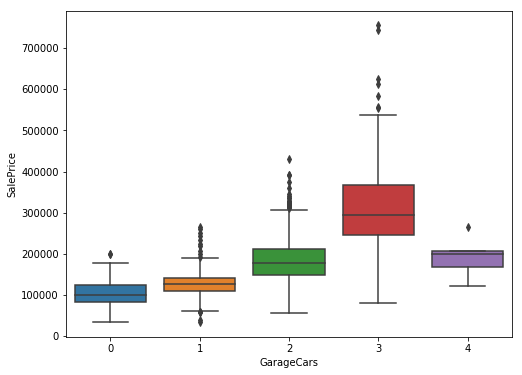

In [68]:
data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)
#증가하다가4에서 떨어짐.

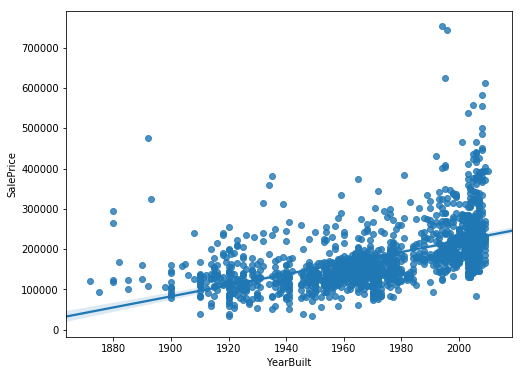

In [69]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='YearBuilt', y="SalePrice", data=data)
#지어진 년도.

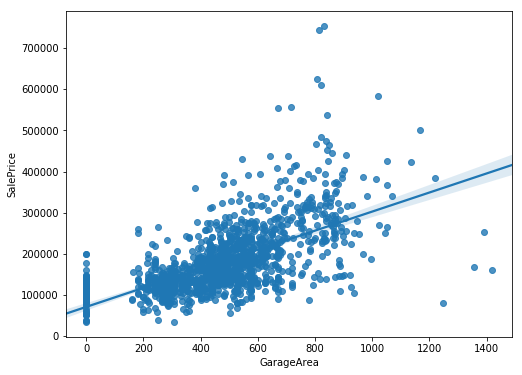

In [70]:
data = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GarageArea', y="SalePrice", data=data)
#차고 넓이, 대체로 증가/ 하지만 차고가 넓지만 가격이 낮은것도 있다.

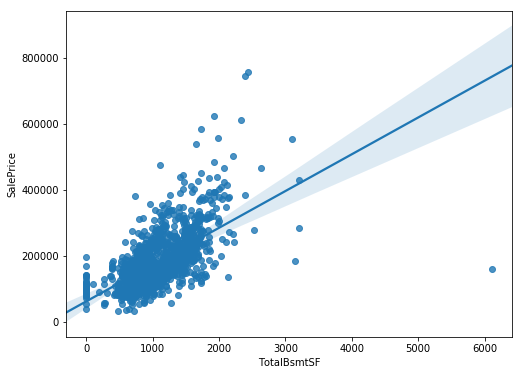

In [71]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='TotalBsmtSF', y="SalePrice", data=data)
#지하실의 크기? square feet, 비례하여 증가히지만 0인데 가격대가 다양한것이 있다.

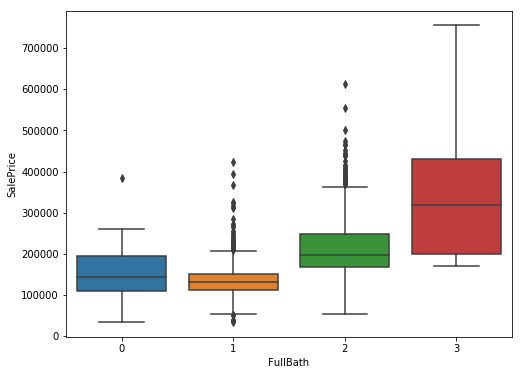

In [72]:
data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data)
#욕실 갯수, 중간에 낮은게 잇는데 이는 hullbath가 아닌 halfbath가 있어서 그런듯.

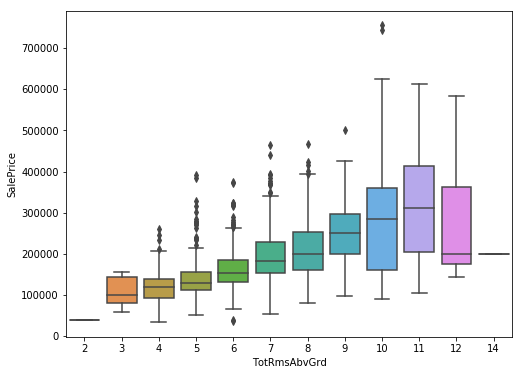

In [73]:
data = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)
#가장 낮은데 6, 가장 높은게 10
#

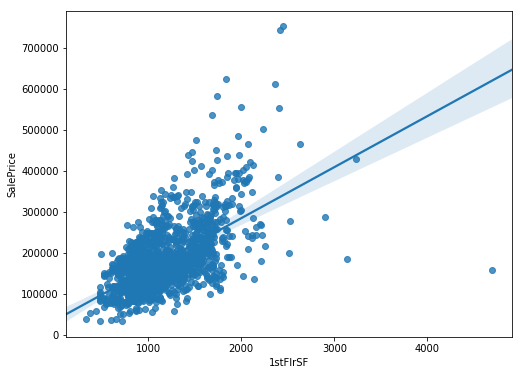

In [74]:
data = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='1stFlrSF', y="SalePrice", data=data)
#1층 면적? 비례하여 증가.

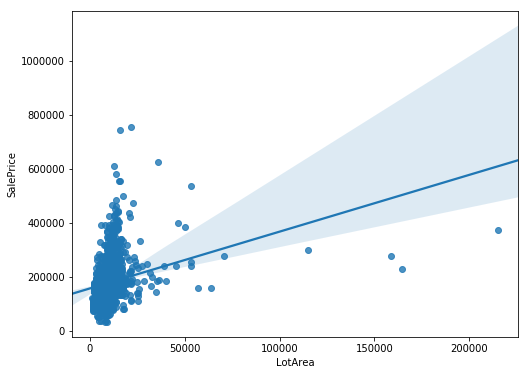

In [75]:
data = pd.concat([df_train['SalePrice'], df_train['LotArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='LotArea', y="SalePrice", data=data)

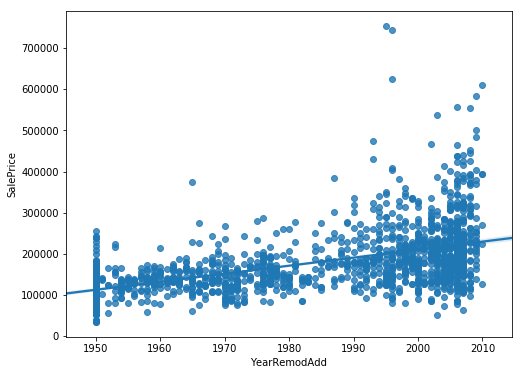

In [76]:
#YearRemodAdd
data=pd.concat([df_train['SalePrice'],df_train['YearRemodAdd']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='YearRemodAdd', y="SalePrice", data=data)
#대체적으로 리모델링 년도가 최신일 수록 가격은 증가. 근데 많이 증가는 안함.

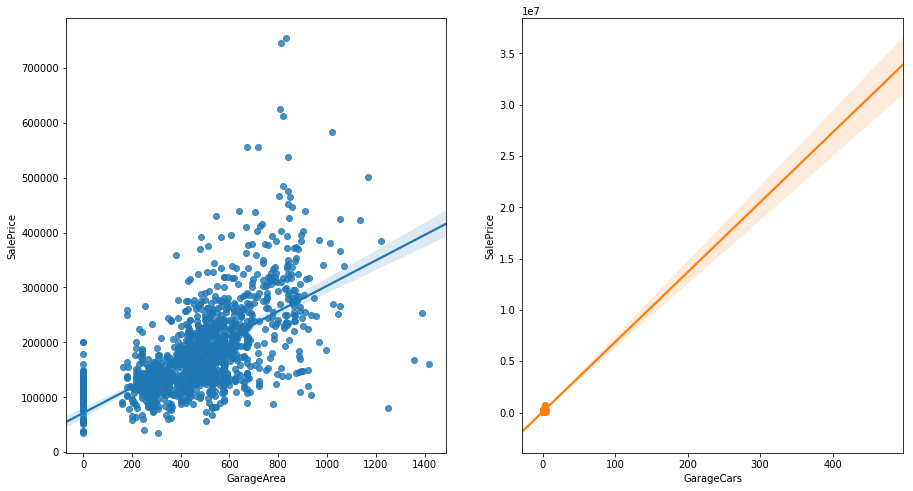

In [77]:
f, ax = plt.subplots(1,2,figsize=(15,8))
data=data = pd.concat([df_train['SalePrice'], df_train['GarageArea']], axis=1)
sns.regplot(x='GarageArea', y="SalePrice", data=data, ax=ax[0])
data_2 = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
sns.regplot(x='GarageCars', y="SalePrice", data=data_2, ax=ax[1])

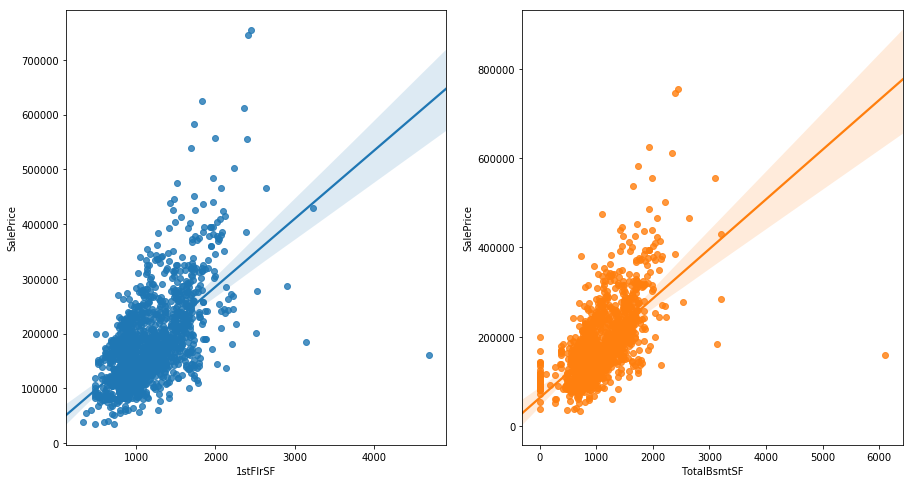

In [78]:
f, ax = plt.subplots(1,2,figsize=(15,8))
data = pd.concat([df_train['SalePrice'], df_train['1stFlrSF']], axis=1)
sns.regplot(x='1stFlrSF', y="SalePrice", data=data, ax=ax[0])
data_2 = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
sns.regplot(x='TotalBsmtSF', y="SalePrice", data=data_2, ax=ax[1])

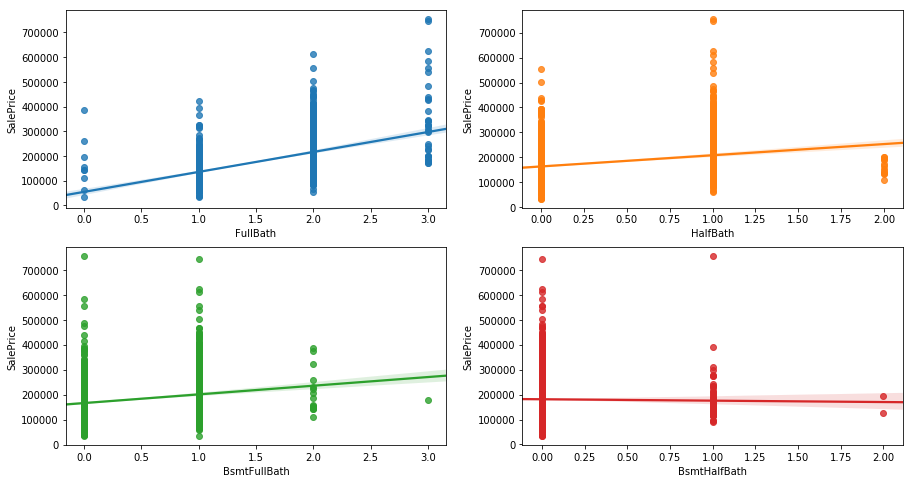

In [79]:
f, ax = plt.subplots(2,2,figsize=(15,8))
data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
sns.regplot(x='FullBath', y="SalePrice", data=data, ax=ax[0,0])
data_2 = pd.concat([df_train['SalePrice'], df_train['HalfBath']], axis=1)
sns.regplot(x='HalfBath', y="SalePrice", data=data_2, ax=ax[0,1])
data_3 = pd.concat([df_train['SalePrice'], df_train['BsmtFullBath']], axis=1)
sns.regplot(x='BsmtFullBath', y="SalePrice", data=data_3, ax=ax[1,0])
data_4 = pd.concat([df_train['SalePrice'], df_train['BsmtHalfBath']], axis=1)
sns.regplot(x='BsmtHalfBath', y="SalePrice", data=data_4, ax=ax[1,1])

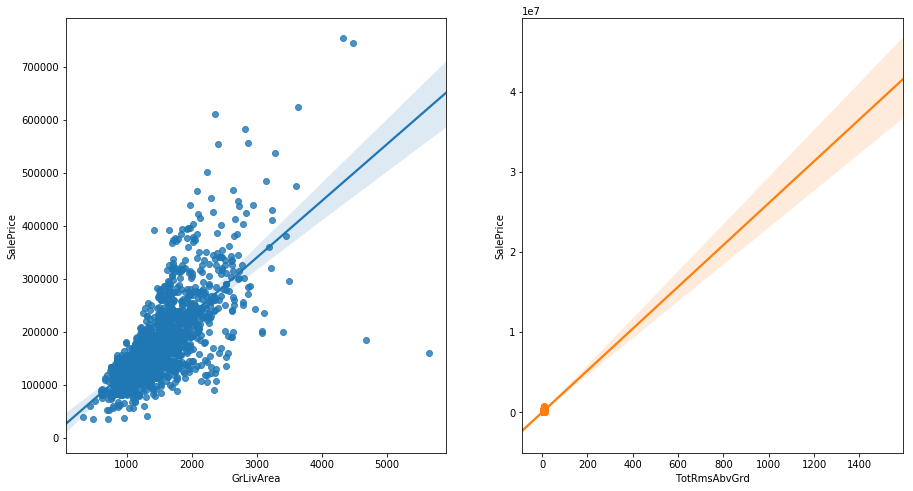

In [80]:
f, ax = plt.subplots(1,2,figsize=(15, 8))
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
sns.regplot(x='GrLivArea', y="SalePrice", data=data, ax=ax[0])
data_2 = pd.concat([df_train['SalePrice'], df_train['TotRmsAbvGrd']], axis=1)
sns.regplot(x='TotRmsAbvGrd', y="SalePrice", scatter = True, data=data_2, ax=ax[1])

In [81]:
'''
My observations :
'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly 
correlated with 'SalePrice'.

'GarageCars' and 'GarageArea' are strongly correlated variables. 
It is because the number of cars that fit into the garage 
is a consequence of the garage area. 'GarageCars' and 
'GarageArea' are like twin brothers. 
So it is hard to distinguish between the two. 
Therefore, we just need one of these variables 
in our analysis (we can keep 'GarageCars' 
since its correlation with 'SalePrice' is higher).


'TotalBsmtSF' and '1stFloor' also seem to be twins. 
In this case let us keep 'TotalBsmtSF'

'TotRmsAbvGrd' and 'GrLivArea', twins

'YearBuilt' it appears like is slightly correlated with 
'SalePrice'. This required more analysis to arrive 
at a conclusion may be do some time series analysis
'''

"\nMy observations :\n'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly \ncorrelated with 'SalePrice'.\n\n'GarageCars' and 'GarageArea' are strongly correlated variables. \nIt is because the number of cars that fit into the garage \nis a consequence of the garage area. 'GarageCars' and \n'GarageArea' are like twin brothers. \nSo it is hard to distinguish between the two. \nTherefore, we just need one of these variables \nin our analysis (we can keep 'GarageCars' \nsince its correlation with 'SalePrice' is higher).\n\n\n'TotalBsmtSF' and '1stFloor' also seem to be twins. \nIn this case let us keep 'TotalBsmtSF'\n\n'TotRmsAbvGrd' and 'GrLivArea', twins\n\n'YearBuilt' it appears like is slightly correlated with \n'SalePrice'. This required more analysis to arrive \nat a conclusion may be do some time series analysis\n"

In [82]:
df_train_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [83]:
df_train_num['totalSF']=df_train['1stFlrSF']+df_train['TotalBsmtSF']
df_test_num['totalSF']=df_test['1stFlrSF']+df_test['TotalBsmtSF']

In [84]:
df_train_num.drop(['GarageArea','1stFlrSF','TotalBsmtSF','TotRmsAbvGrd'],axis=1,inplace=True)
df_test_num.drop(['GarageArea','1stFlrSF','TotalBsmtSF','TotRmsAbvGrd'],axis=1,inplace=True)

In [85]:
df_train_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'totalSF'],
      dtype='object')

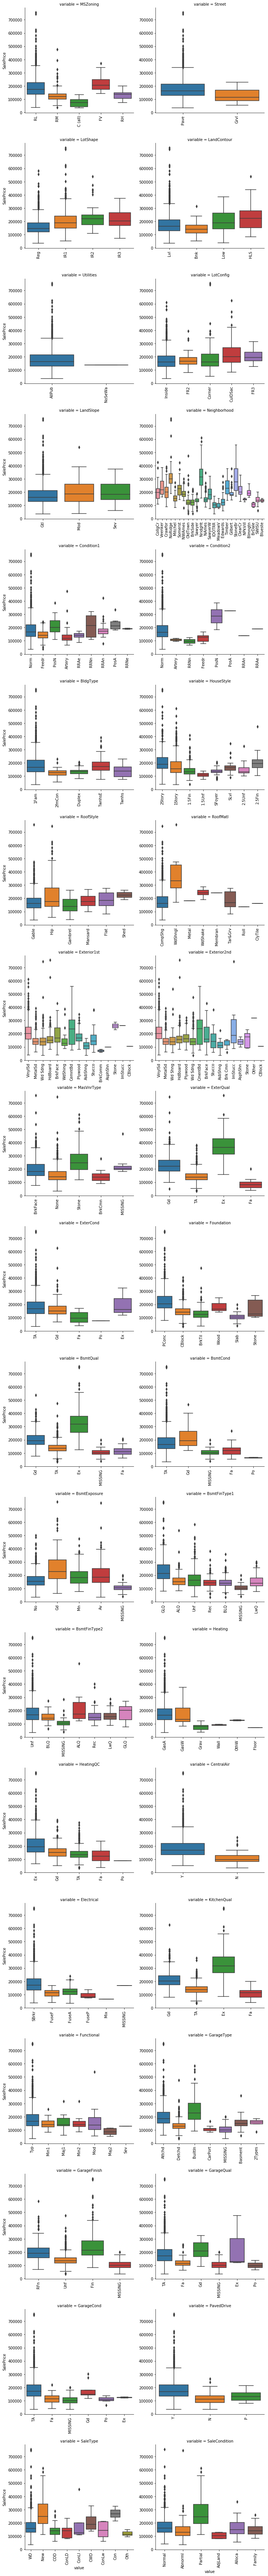

In [104]:
#cetegorical 변수 시각화.
for c in df_train_obj:
    df_train[c] = df_train[c].astype('category')
    #astype은 새로운 배열을 복사해서 변수에 넣음.
    if df_train[c].isnull().any():
        df_train_obj[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train_obj[c] = df_train[c].fillna('MISSING')
for c in df_test_obj:
    df_test[c] = df_test[c].astype('category')
    if df_test[c].isnull().any():
        df_test_obj[c] = df_test[c].cat.add_categories(['MISSING'])
        df_test_obj[c] = df_test[c].fillna('MISSING')
        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=df_train_obj)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")


Text(0.5,1,'Total Missing Value (%)')

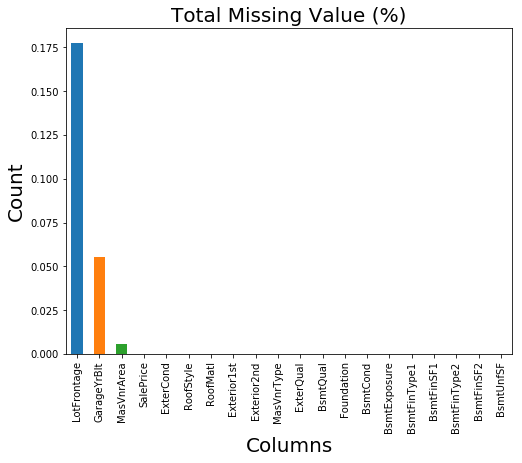

In [89]:
#null값들

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [90]:
#missing value
#null

total = df_train_num.isnull().sum().sort_values(ascending=False)
percent = (df_train_num.isnull().sum()/df_train_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFinSF1,0,0.000000
GrLivArea,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
BsmtUnfSF,0,0.000000
BsmtFinSF2,0,0.000000


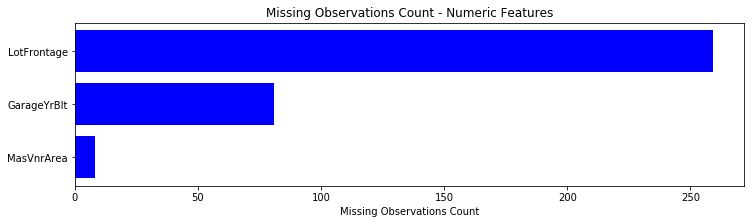

In [91]:
#bar로 어느정도인지 표현(null이 있는 것만)

missing_values = df_train_num.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [105]:
#categorical feature 중의 null

total = df_train_obj.isnull().sum().sort_values(ascending=False)
percent = (df_train_obj.isnull().sum()/df_train_obj.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)


,Total Missing Count,% of Total Observations
Feature,,
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtCond,37,0.025342
BsmtQual,37,0.025342
BsmtFinType1,37,0.025342


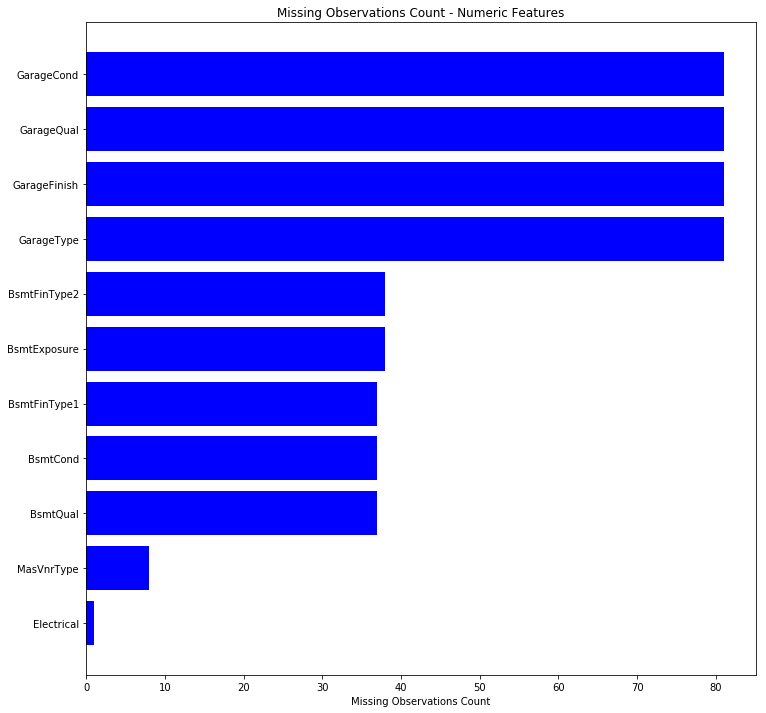

In [106]:
missing_values = df_train_obj.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [94]:
df_train_obj.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
df_test_obj.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [107]:
print(df_train_obj.columns)
print(df_test_obj.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'Heating

In [109]:
for column_name in df_train_obj.columns:
    if df_train_obj[column_name].isnull().sum() != 0 :
        m=df_train[[f'{column_name}','SalePrice']].groupby([f'{column_name}'],as_index=True).mean()
#         m.sort_values(by='SalePrice',ascending=False).plot.bar()
        print(m.sort_values(by='SalePrice',ascending=False))
        print(df_test[column_name].unique())

                SalePrice
MasVnrType               
Stone       265583.625000
MISSING     236484.250000
BrkFace     204691.871910
None        156221.891204
BrkCmn      146318.066667
[None, BrkFace, Stone, BrkCmn, MISSING]
Categories (5, object): [None, BrkFace, Stone, BrkCmn, MISSING]
              SalePrice
BsmtQual               
Ex        327041.041322
Gd        202688.478964
TA        140759.818182
Fa        115692.028571
MISSING   105652.891892
[TA, Gd, Ex, Fa, MISSING]
Categories (5, object): [TA, Gd, Ex, Fa, MISSING]
              SalePrice
BsmtCond               
Gd        213599.907692
TA        183632.620900
Fa        121809.533333
MISSING   105652.891892
Po         64000.000000
[TA, Po, Fa, Gd, MISSING]
Categories (5, object): [TA, Po, Fa, Gd, MISSING]
                  SalePrice
BsmtExposure               
Gd            257689.805970
Av            206643.420814
Mn            192789.657895
No            165652.295908
MISSING       107938.342105
[No, Gd, Mn, Av, MISSING]
Cate

In [49]:
'''
GarageCond,
GarageQual
GarageFinish
GarageType
BsmtFinType2
BsmtExposure
BsmtFinType1
BsmtQual
BsmtCond

MasVnrType
Electrical
'''

'\nGarageCond,\nGarageQual\nGarageFinish\nGarageType\nBsmtFinType2\nBsmtExposure\nBsmtFinType1\nBsmtQual\nBsmtCond\n\nMasVnrType\nElectrical\n'

In [50]:
for column_name in df_train_obj.columns:
    print(column_name)
    df_train_obj[column_name] = df_train_obj[column_name].fillna(df_train_obj[column_name].mode().iloc[0])
    unique_category = len(df_train_obj[column_name].unique())
    print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                             unique_category=unique_category))
for column_name in df_test_obj.columns:
    print(column_name)
    df_test_obj[column_name] = df_test_obj[column_name].fillna(df_test_obj[column_name].mode().iloc[0])
    unique_category = len(df_test_obj[column_name].unique())
    print("Feature '{column_name}' test has '{unique_category}' unique categories".format(column_name = column_name,
                                                                             unique_category=unique_category))


MSZoning
Feature 'MSZoning' has '5' unique categories
Street
Feature 'Street' has '2' unique categories
LotShape
Feature 'LotShape' has '4' unique categories
LandContour
Feature 'LandContour' has '4' unique categories
Utilities
Feature 'Utilities' has '2' unique categories
LotConfig
Feature 'LotConfig' has '5' unique categories
LandSlope
Feature 'LandSlope' has '3' unique categories
Neighborhood
Feature 'Neighborhood' has '25' unique categories
Condition1
Feature 'Condition1' has '9' unique categories
Condition2
Feature 'Condition2' has '8' unique categories
BldgType
Feature 'BldgType' has '5' unique categories
HouseStyle
Feature 'HouseStyle' has '8' unique categories
RoofStyle
Feature 'RoofStyle' has '6' unique categories
RoofMatl
Feature 'RoofMatl' has '8' unique categories
Exterior1st
Feature 'Exterior1st' has '15' unique categories
Exterior2nd
Feature 'Exterior2nd' has '16' unique categories
MasVnrType
Feature 'MasVnrType' has '4' unique categories
ExterQual
Feature 'ExterQual' has

In [104]:
# df_train_obj = df_train.select_dtypes(include=[np.object])
# df_test_obj = df_test.select_dtypes(include=[np.object])

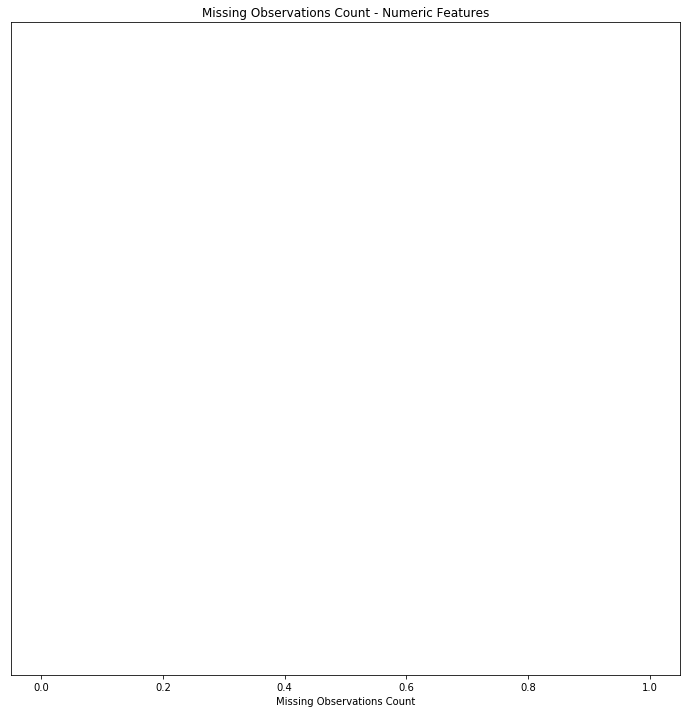

In [189]:
missing_values = df_train_obj.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [190]:
#전처리 
#위의 target_log로 target의 편차를 줄여놓음
target_log.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [191]:
df_train_obj.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [192]:
#인코딩 (categorical 변수) - one-hot-encoding
dummies = pd.get_dummies(df_train_obj, drop_first=True)
dummies_test=pd.get_dummies(df_test_obj, drop_first=True)

In [193]:
print(dummies.shape, dummies_test.shape)

(1460, 196) (1459, 180)


In [194]:
def find(x) :
    if x not in dummies_test.columns :
        return x
drop_train=list(filter(find,dummies.columns))
dummies=dummies.drop(drop_train,axis=1)
print(dummies.shape, dummies_test.shape)

(1460, 180) (1459, 180)


In [195]:
for col in df_train_num.columns :
    if df_train_num[col].isnull().sum() != 0 :
        print(f'{col} : {df_train[col].isnull().sum() / df_train[col].shape[0]}')
        print(df_train_num[col].describe()['mean'])
        print()
        df_train_num.loc[df_train_num[col].isnull()] = df_train_num[col].describe()['mean']

for col in df_test_num.columns :
    if df_test_num[col].isnull().sum() != 0 :
        print(f'{col} : {df_test[col].isnull().sum() / df_test[col].shape[0]}')
        print(df_test_num[col].describe()['mean'])
        print()
        df_test_num.loc[df_test_num[col].isnull()] = df_test_num[col].describe()['mean']

LotFrontage : 0.1773972602739726
70.04995836802665

MasVnrArea : 0.005479452054794521
96.88716589911867

GarageYrBlt : 0.05547945205479452
1613.643767830244

LotFrontage : 0.15558601782042494
68.58035714285714

MasVnrArea : 0.01028101439342015
93.04885433109686

BsmtFinSF1 : 0.0006854009595613434
366.7196697318719

BsmtFullBath : 0.0013708019191226869
11.98559543127743

GarageYrBlt : 0.053461274845784786
1646.8953706596258



(1459, 37)

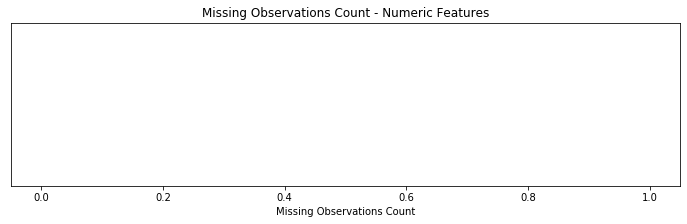

In [196]:
#bar로 어느정도인지 표현(null이 있는 것만)

missing_values = df_train_num.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [197]:
df_train_num.shape

(1460, 35)

In [198]:
s= df_train_num.skew()
s=s[s>0.75]
s=s.index
df_train_num[s] = np.log1p(df_train_num[s])

In [199]:
df_train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,totalSF
0,1.0,4.110874,4.189655,9.042040,2.079442,1.791759,2003.0,2003.0,5.283204,6.561031,...,4.127134,0.000000,0.0,0.0,0.0,0.0,1.098612,2008.0,12.247699,1712.0
1,2.0,3.044522,4.394449,9.169623,1.945910,2.197225,1976.0,1976.0,0.000000,6.886532,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.791759,2007.0,12.109016,2524.0
2,3.0,4.110874,4.234107,9.328212,2.079442,1.791759,2001.0,2002.0,5.093750,6.188264,...,3.761200,0.000000,0.0,0.0,0.0,0.0,2.302585,2008.0,12.317171,1840.0
3,4.0,4.262680,4.110874,9.164401,2.079442,1.791759,1915.0,1970.0,0.000000,5.379897,...,3.583519,5.609472,0.0,0.0,0.0,0.0,1.098612,2006.0,11.849405,1717.0
4,5.0,4.110874,4.442651,9.565284,2.197225,1.791759,2000.0,2000.0,5.860786,6.486161,...,4.442651,0.000000,0.0,0.0,0.0,0.0,2.564949,2008.0,12.429220,2290.0


In [200]:
s= df_test_num.skew()
s=s[s>0.75]
s=s.index
df_test_num[s] = np.log1p(df_test_num[s])

In [201]:
df_test_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,totalSF
0,1461.0,3.044522,4.394449,9.360741,1.791759,1.945910,1961.0,1961.0,0.000000,6.150603,...,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,1.945910,2010.0,1778.0
1,1462.0,3.044522,4.406719,9.565775,1.945910,1.945910,1958.0,1958.0,4.691348,6.828712,...,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,1.945910,2010.0,2658.0
2,1463.0,4.110874,4.317488,9.534668,1.791759,1.791759,1997.0,1998.0,0.000000,6.674561,...,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,1.386294,2010.0,1856.0
3,1464.0,4.110874,4.369448,9.208238,1.945910,1.945910,1998.0,1998.0,3.044522,6.401917,...,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,1.945910,2010.0,1852.0
4,1465.0,4.795791,3.784190,8.518392,2.197225,1.791759,1992.0,1992.0,0.000000,5.575949,...,0.000000,4.418841,0.0,0.0,4.976734,0.0,0.000000,0.693147,2010.0,2560.0


In [202]:
df_train = pd.merge(dummies, df_train_num, left_index=True, right_index=True)
df_test=pd.merge(dummies_test, df_test_num, left_index=True, right_index=True)

In [203]:
# x_train=df_train.drop('SalePrice', axis=1).values
# target=target_log
# x_test=df_test.values
x_train=df_train.drop('SalePrice', axis=1)
x_test=df_test
target=target_log

In [204]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_tr,x_vld,y_tr,y_vld = train_test_split(x_train, target, test_size=0.3, random_state=2018)

In [205]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score


#손실을 줄이는 방법으로 mse(제곱), mae(절대값) -> mse가 바로 계산이라 다소 빠르고 차이를 극대화시켜 cost를 쉽게 구별할 수 잇도록 하기 위함

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, target, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [206]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

Text(0, 0.5, 'rmse')

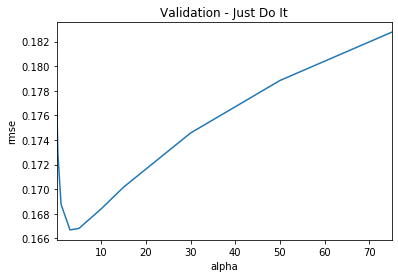

In [207]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [208]:
cv_ridge.min()

0.16669480913587084

In [209]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train,target) #L1 regularization-a로 조절, a가 작아질수록 선형적

In [241]:
model_lasso

LassoCV(alphas=[1, 0.1, 0.001, 0.0005], copy_X=True, cv='warn', eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [210]:
rmse_cv(model_lasso).mean()

0.16976074406734015

In [211]:
coef = pd.Series(model_lasso.coef_, index = x_train.columns)

In [212]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 128 variables and eliminated the other 86 variables


In [213]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

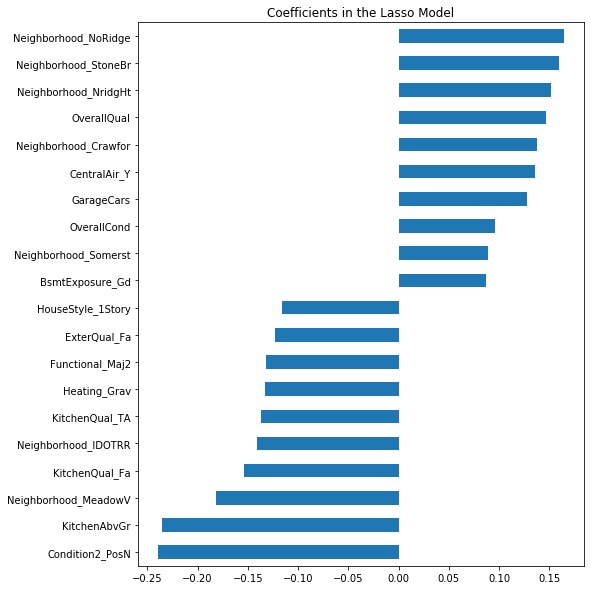

In [214]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

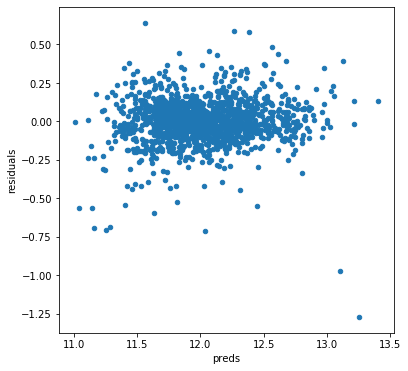

In [215]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(x_train), "true":target})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

In [216]:
print(model_lasso.score(x_train,target))

0.8699217319200157


In [217]:
prediction=model_lasso.predict(x_test)

In [218]:
result=np.expm1(prediction)
result

array([118397.95923498, 150235.481008  , 176727.87644056, ...,
       132093.03306828, 115637.79675424, 203744.94429688])

In [219]:
df_result=pd.read_csv('./houseprices/sample_submission.csv')
df_result['SalePrice'] = result
df_result.to_csv('./houseprices/sample_submission.csv', index=False)

In [220]:
df_result

,Id,SalePrice
0,1461,118397.959235
1,1462,150235.481008
2,1463,176727.876441
3,1464,193407.859503
4,1465,203822.453664
...,...,...
1454,2915,88308.393440
1455,2916,77496.831546
1456,2917,132093.033068
1457,2918,115637.796754


In [56]:
# from sklearn.model_selection import train_test_split
#안하게는게 더 높음.
# x_tr,x_vld,y_tr,y_vld = train_test_split(x_train, target, test_size=0.3, random_state=2018)

In [221]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_train,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
train_predict=lg.predict(x_train)

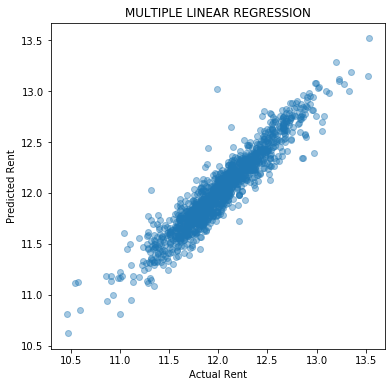

In [223]:
plt.scatter(target, train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [224]:
# print(lg.coef_)
coef = pd.Series(lg.coef_, index = x_train.columns)

In [225]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the lg Model')

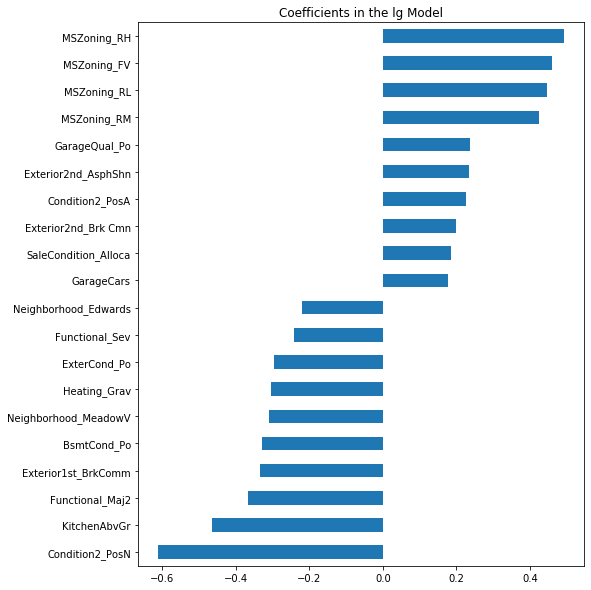

In [226]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the lg Model")

In [227]:
print(lg.score(x_train,target))

0.892801310255208


In [228]:
print(((target - train_predict)**2).sum())

24.955601376564815


In [229]:
prediction = lg.predict(x_test)
prediction

array([11.70997025, 11.85341805, 12.05824103, ..., 11.79825649,
       11.56285524, 12.19280234])

In [230]:
result=np.expm1(prediction)
result

array([121778.8576449 , 140562.98129307, 172514.26905356, ...,
       133019.22791787, 105118.72732579, 197362.47122447])

In [231]:
df_result=pd.read_csv('./houseprices/sample_submission.csv')
df_result['SalePrice'] = result
df_result.to_csv('./houseprices/sample_submission.csv', index=False)

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
#find optimal alpha with grid search
alpha=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param = dict(alpha=alpha)
lg_2=Lasso()
grid_search=GridSearchCV(estimator=lg_2, param_grid=param,
            scoring='r2', verbose=1, n_jobs=-1)

In [235]:
grid_search

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [236]:
grid_search.fit(x_train,target)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    4.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [237]:
print('Best Score: ', grid_search.best_score_)
print('Best Params: ', grid_search.best_params_)

Best Score:  0.8025555804841348
Best Params:  {'alpha': 0.001}


In [238]:
prediction = grid_search.predict(x_test)

In [239]:
result=np.expm1(prediction)

In [240]:
df_result=pd.read_csv('./houseprices/sample_submission.csv')
df_result['SalePrice'] = result
df_result.to_csv('./houseprices/sample_submission.csv', index=False)